# Adaptar un modelo de regresión

https://raw.githubusercontent.com/Fabimath/LEC-PYE/master/Clases/fisica.csv

In [119]:
data=read.csv('fisica.csv')
head(data)

,temperatura,presion,volumen,permeabilidad
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4432245,106.8311,105.65548,-0.7534458
2,-2.0987430,88.4479,128.07853,-221.3009848
3,-0.5628929,99.0791,94.55501,-8.8191858
4,1.2765570,106.1712,129.60404,44.0956849
5,2.4197358,107.7927,190.33082,340.9647821
6,-1.2237800,92.4181,99.74399,-50.3271329


## Visualización global

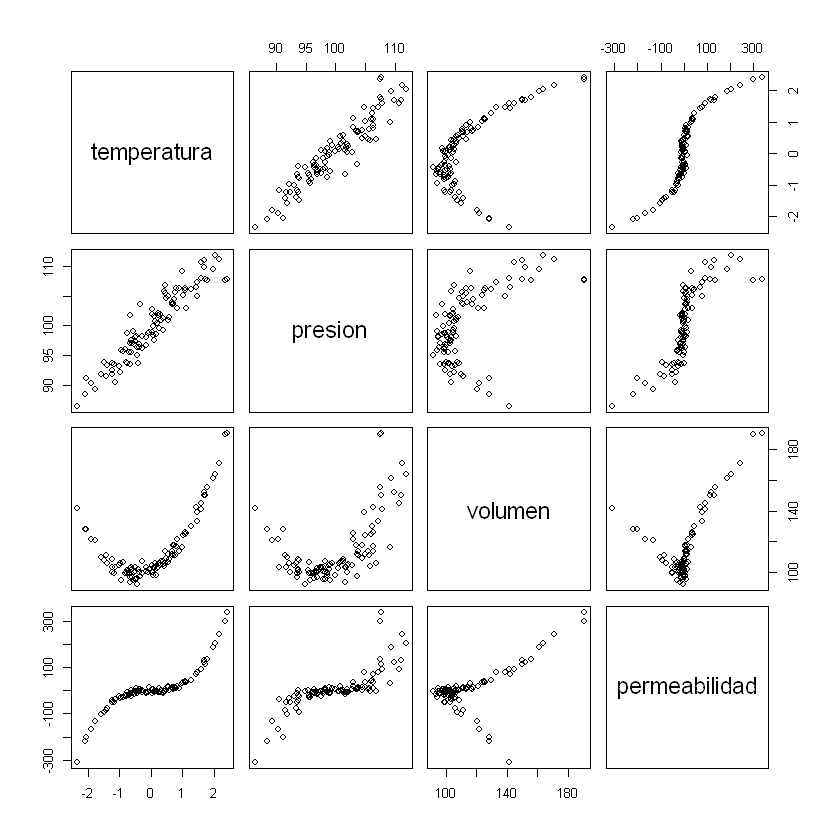

In [120]:
plot(data)

## Patrones de tendencia
* Presión depende linealmente de la temperatura
* Volumen depende cuadraticamente de la temperatura
* Permeabilidad depende cubicamente de la temperatura

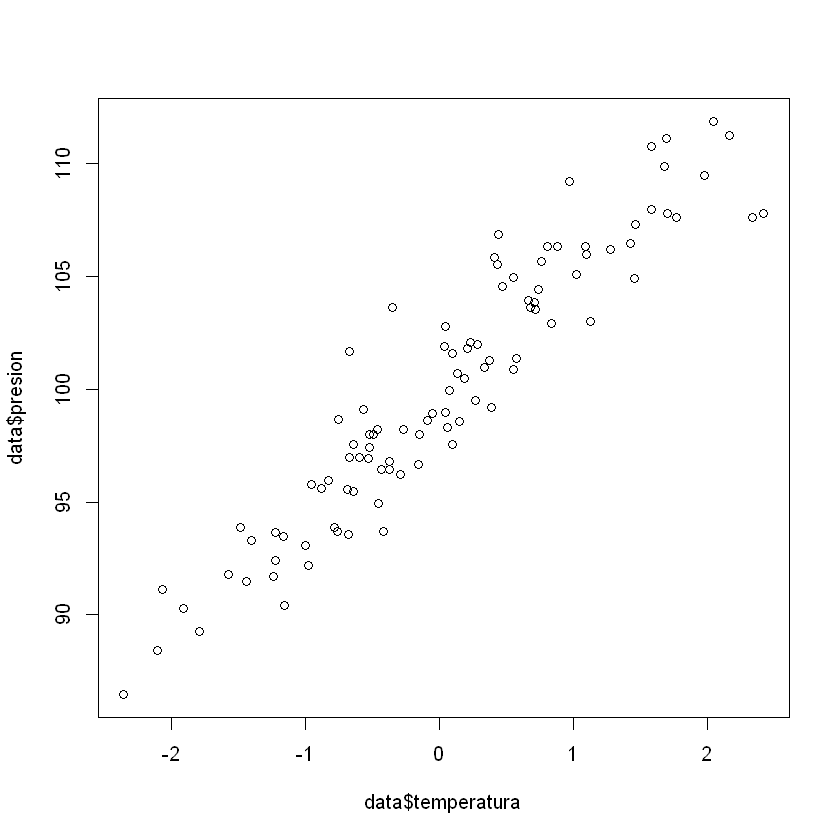

In [121]:
plot(data$temperatura,data$presion)

### Análisis de Presión v/s temperatura

In [122]:
reg1=lm(presion~temperatura,data=data)
summary(reg1)


Call:
lm(formula = presion ~ temperatura, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6265 -1.1942 -0.0905  0.9167  5.6345 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  99.7940     0.1988  502.07   <2e-16 ***
temperatura   5.2176     0.1889   27.62   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.985 on 98 degrees of freedom
Multiple R-squared:  0.8862,	Adjusted R-squared:  0.885 
F-statistic: 763.1 on 1 and 98 DF,  p-value: < 2.2e-16


In [123]:
reg1$coef

(Intercept) temperatura 
  99.793991    5.217597

¿ Si la temperatura vale 3, cuanto vale la presión?

In [124]:
reg1$coef[1] + reg1$coef[2]*3

(Intercept) 
   115.4468

In [125]:
#genero una banda de predicciones
pp = seq(-3,3,0.05)

In [126]:
# Aplico el modelo de regresión a todos los puntos
predict = reg1$coef[1]*rep(1,length(pp))  + reg1$coef[2]*pp

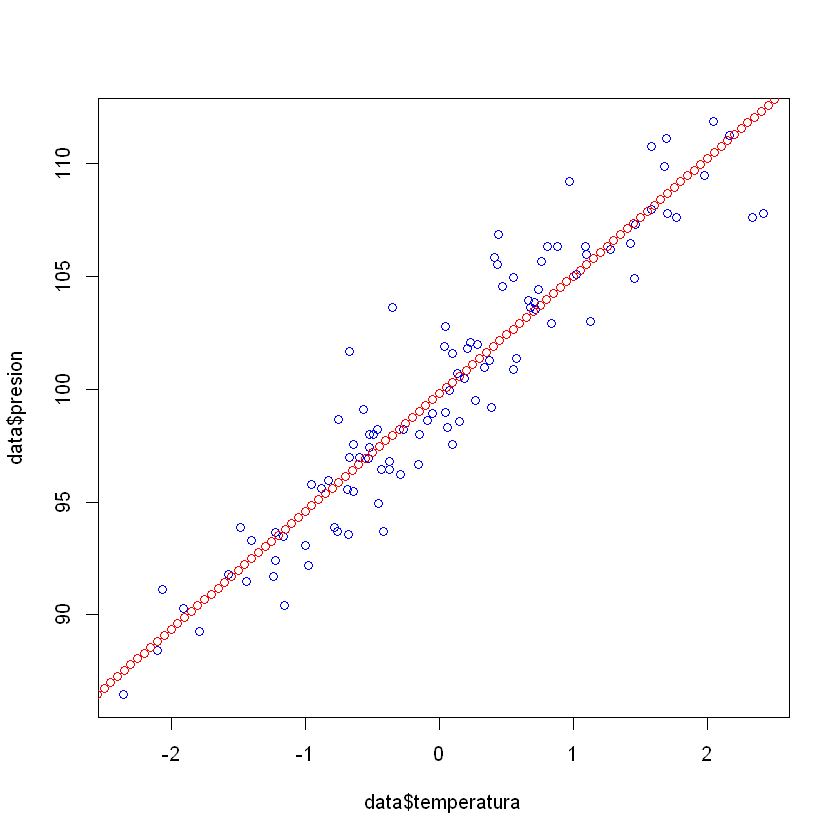

In [127]:
plot(data$temperatura,data$presion,col='blue')
points(pp,predict,col='red')

## Analisis Volumen v/s Temperatura

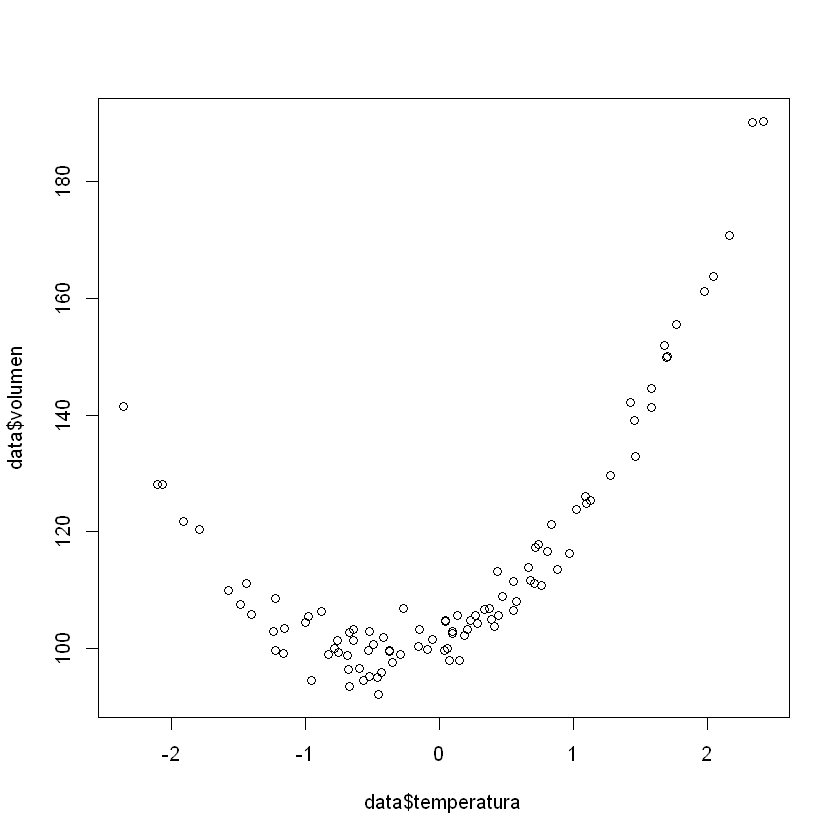

In [128]:
plot(data$temperatura,data$volumen)

In [129]:
#es correcto elevar los datos al cuadrado antes de introducirlos a la función lm
temperatura2 = data$temperatura^2

In [130]:
reg2=lm(volumen~temperatura+temperatura2,data=data)
summary(reg2)


Call:
lm(formula = volumen ~ temperatura + temperatura2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6948 -2.4387  0.2211  1.9665  7.8977 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  100.8131     0.3944  255.58   <2e-16 ***
temperatura    9.9964     0.2978   33.56   <2e-16 ***
temperatura2  11.0460     0.2234   49.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.088 on 97 degrees of freedom
Multiple R-squared:  0.9776,	Adjusted R-squared:  0.9771 
F-statistic:  2114 on 2 and 97 DF,  p-value: < 2.2e-16


¿Si la temperatura vale 3, cuanto vale el volumen?

In [131]:
reg2$coef[1] + reg2$coef[2]*3 + reg2$coef[3]*3^2

(Intercept) 
   230.2169

In [132]:
#genero una banda de predicciones
pp = seq(-3,3,0.05)
# Aplico el modelo de regresión a todos los puntos
predict = reg2$coef[1]*rep(1,length(pp))  + reg2$coef[2]*pp + reg2$coef[3]*pp^2

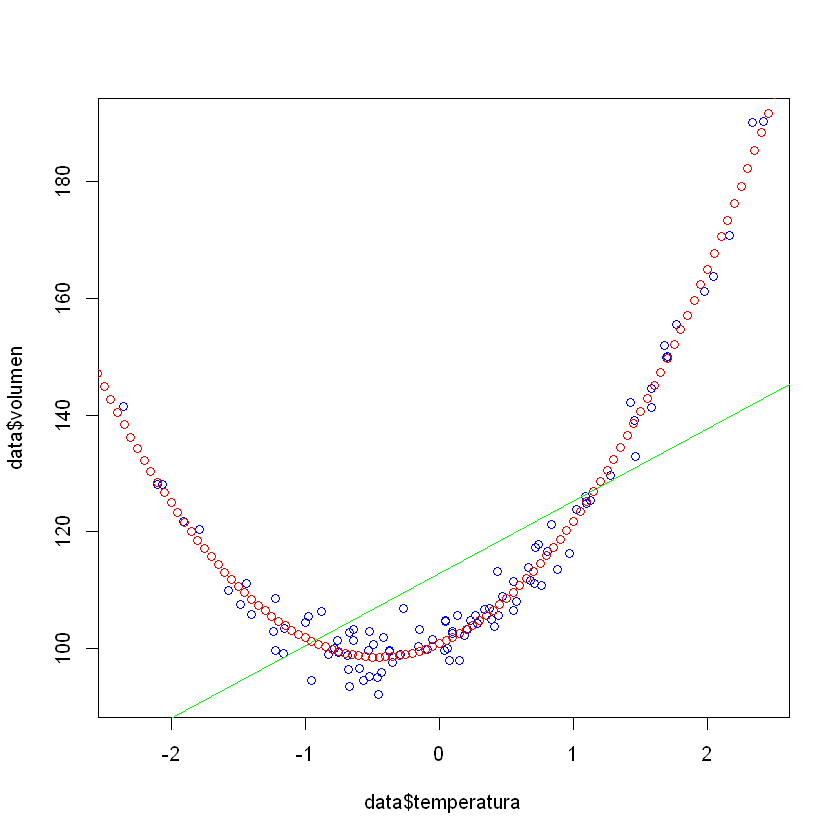

In [133]:
plot(data$temperatura,data$volumen,col='blue')
abline(lm(volumen~temperatura,data=data),col='green')
points(pp,predict,col='red')

## Analísis Permeabilidad v/s Temperatura

In [134]:
temperatura2 = data$temperatura^2
temperatura3 = data$temperatura^3

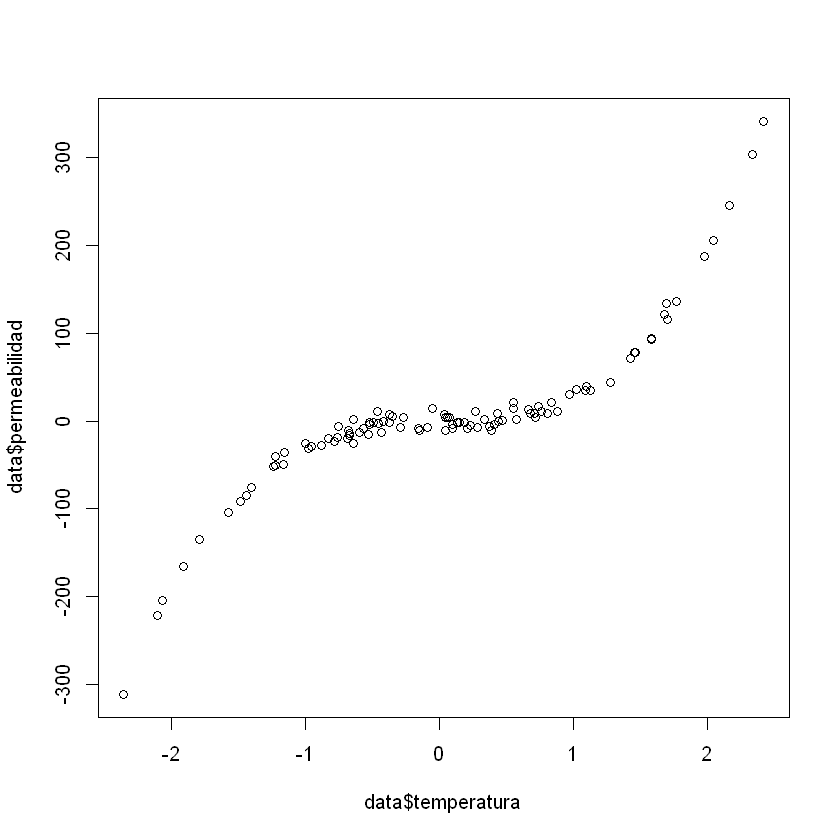

In [135]:
plot(data$temperatura,data$permeabilidad)

In [136]:
reg3=lm(permeabilidad~temperatura+temperatura3,data=data)
summary(reg3)


Call:
lm(formula = permeabilidad ~ temperatura + temperatura3, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8833  -5.0040  -0.7067   4.8829  16.9795 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.1729     0.6795  -1.726   0.0875 .  
temperatura    5.2487     1.2562   4.178 6.43e-05 ***
temperatura3  22.9350     0.3753  61.105  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.763 on 97 degrees of freedom
Multiple R-squared:  0.994,	Adjusted R-squared:  0.9938 
F-statistic:  7986 on 2 and 97 DF,  p-value: < 2.2e-16


¿Si la temperatura vale 3, cuanto vale el permeabilidad?


In [137]:
reg3$coef[1] + reg3$coef[2]*3  + reg3$coef[3]*3^3

(Intercept) 
   633.8194

In [138]:
#genero una banda de predicciones
pp = seq(-3,3,0.01)
# Aplico el modelo de regresión a todos los puntos
predict = reg3$coef[1]*rep(1,length(pp))  + reg3$coef[2]*pp+ reg3$coef[3]*pp^3

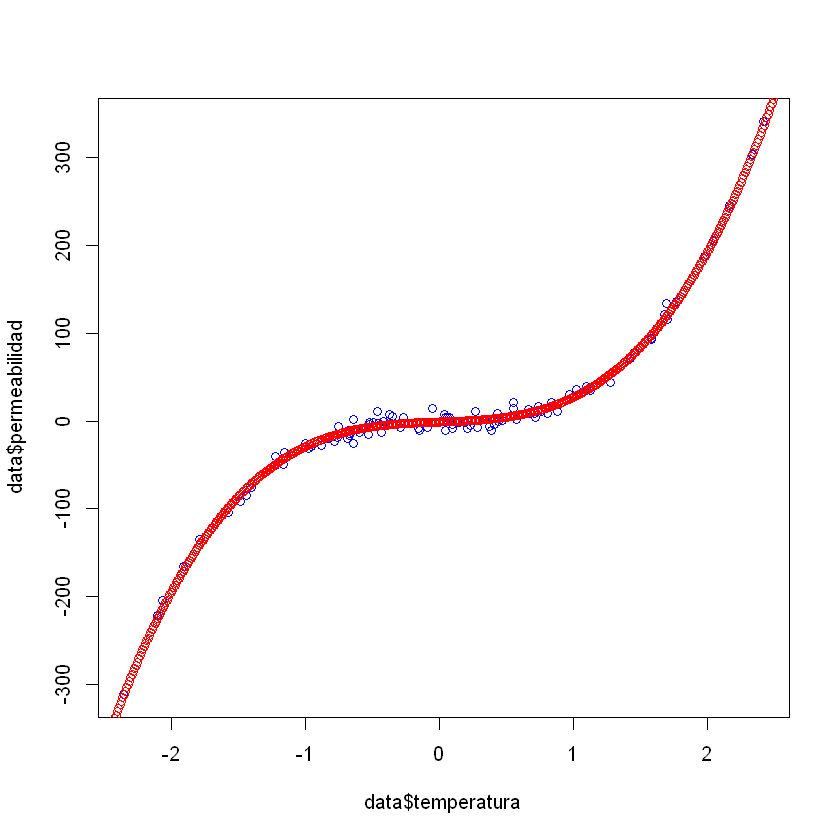

In [139]:
plot(data$temperatura,data$permeabilidad,col='blue')
points(pp,predict,col='red')

# Modelo de regresión multiple

In [157]:
x1 = rnorm(1000,10,1)
x2 = rnorm(1000,5,1)
x3 = rnorm(1000,-4,1)
x4 = rnorm(1000,0,1)

In [158]:
y = 30 + 23*x1 + 12*x2 + -3*x3 + 2*x4 + rnorm(1000,10,4)

In [159]:
data=data.frame(y,x1,x2,x3,x4)

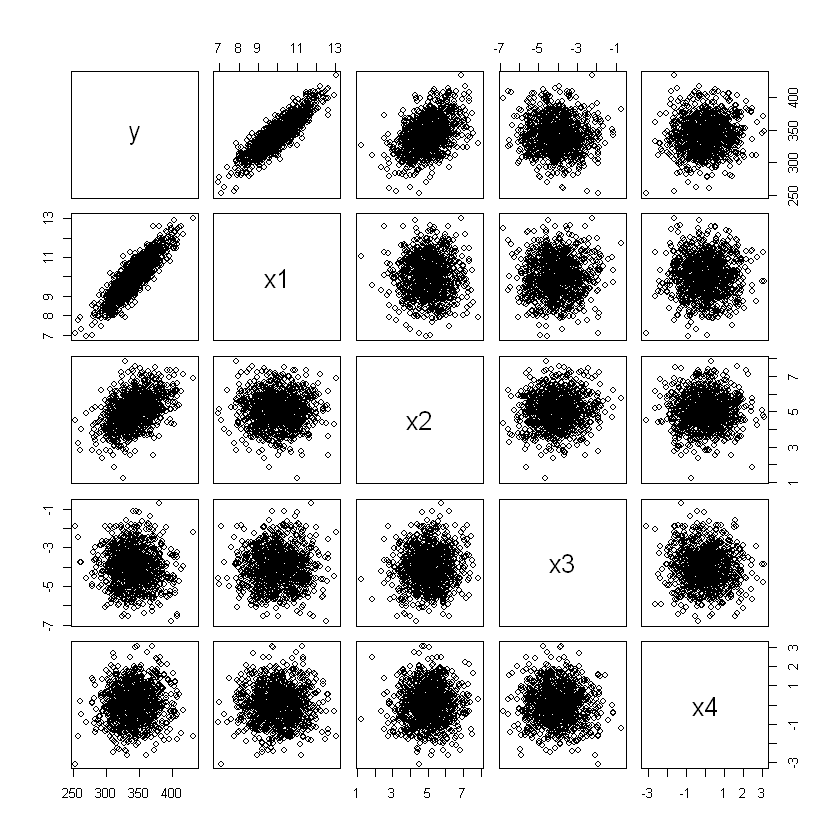

In [160]:
plot(data)


Call:
lm(formula = y ~ x1 + x2 + x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1132  -3.0435   0.1245   3.0443  15.6944 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.1727     1.7544   21.19   <2e-16 ***
x1           23.0192     0.1416  162.52   <2e-16 ***
x2           12.2720     0.1524   80.51   <2e-16 ***
x3           -3.3136     0.1478  -22.42   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.481 on 996 degrees of freedom
Multiple R-squared:  0.9708,	Adjusted R-squared:  0.9707 
F-statistic: 1.103e+04 on 3 and 996 DF,  p-value: < 2.2e-16


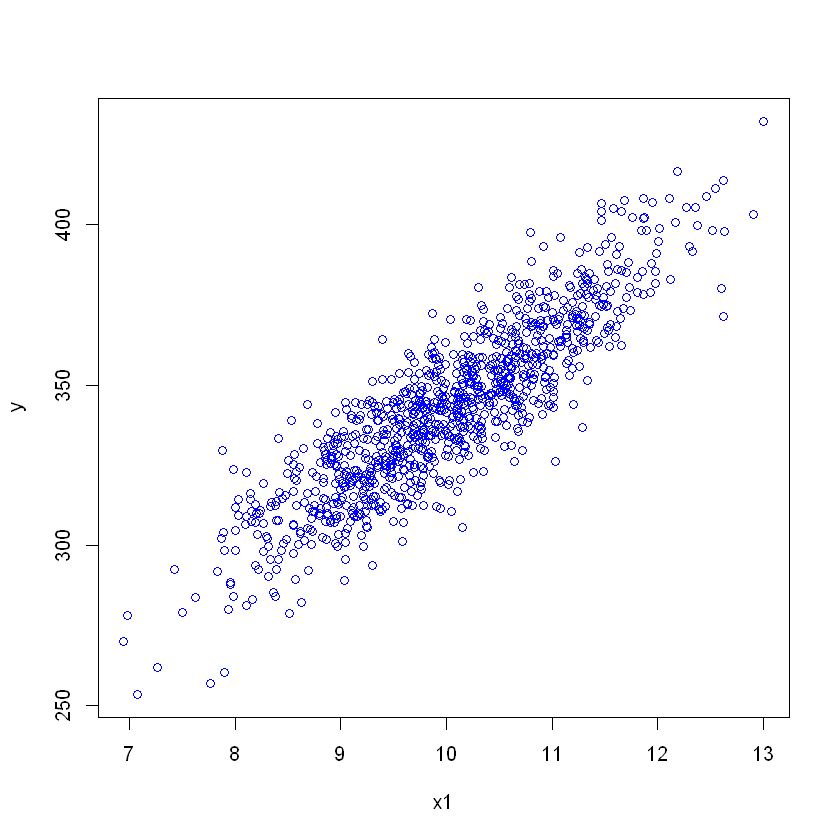

In [167]:
plot(x1,y,col='blue')
reg = lm(y~x1+x2+x3)
summary(reg)

In [144]:
summary(lm(y~.,data=data))


Call:
lm(formula = y ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6178  -2.7384  -0.0974   2.7232  14.3549 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.4957     1.5134   28.08   <2e-16 ***
x1           22.7608     0.1272  178.92   <2e-16 ***
x2           12.0862     0.1303   92.73   <2e-16 ***
x3           -2.9208     0.1249  -23.38   <2e-16 ***
x4            2.3039     0.1299   17.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.127 on 995 degrees of freedom
Multiple R-squared:  0.9764,	Adjusted R-squared:  0.9764 
F-statistic: 1.031e+04 on 4 and 995 DF,  p-value: < 2.2e-16



Call:
lm(formula = Petal.Length ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78396 -0.15708  0.00193  0.14730  0.65418 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.11099    0.26987  -4.117 6.45e-05 ***
Sepal.Length       0.60801    0.05024  12.101  < 2e-16 ***
Sepal.Width       -0.18052    0.08036  -2.246   0.0262 *  
Petal.Width        0.60222    0.12144   4.959 1.97e-06 ***
Speciesversicolor  1.46337    0.17345   8.437 3.14e-14 ***
Speciesvirginica   1.97422    0.24480   8.065 2.60e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2627 on 144 degrees of freedom
Multiple R-squared:  0.9786,	Adjusted R-squared:  0.9778 
F-statistic:  1317 on 5 and 144 DF,  p-value: < 2.2e-16


[1] "Respuesta a la Pregunta 1.1"
[1] "Todas menos Sepal.Width"



Call:
lm(formula = Petal.Length ~ ., data = data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76508 -0.15779  0.01102  0.13378  0.66548 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.45957    0.22387  -6.520 1.09e-09 ***
Sepal.Length       0.55873    0.04583  12.191  < 2e-16 ***
Petal.Width        0.50641    0.11528   4.393 2.15e-05 ***
Speciesversicolor  1.73146    0.12762  13.567  < 2e-16 ***
Speciesvirginica   2.30468    0.19839  11.617  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2664 on 145 degrees of freedom
Multiple R-squared:  0.9778,	Adjusted R-squared:  0.9772 
F-statistic:  1600 on 4 and 145 DF,  p-value: < 2.2e-16


[1] "Respuesta a la Pregunta 1.2"
[1] "La segunda regresión puesto que tiene casi los mismos R2 y usa menos covariables."


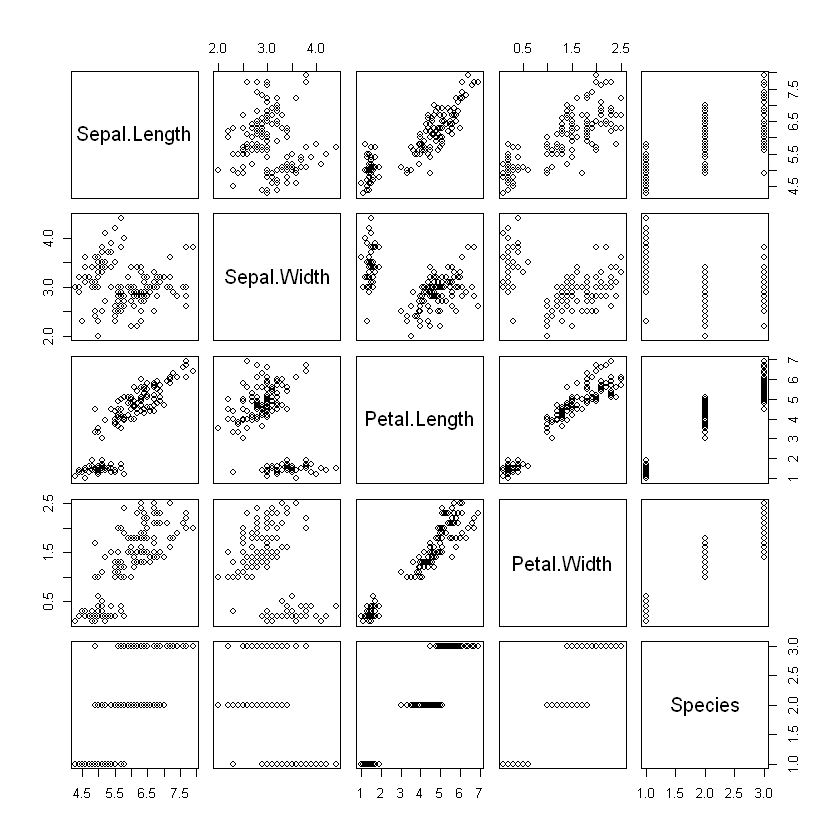

[1] "Respuesta de la pregunta 2.1"
[1] "Tiene un R2, es decir su capacidad para explicar los datos o predecir es baja. Por lo tanto no es un buen modelo"


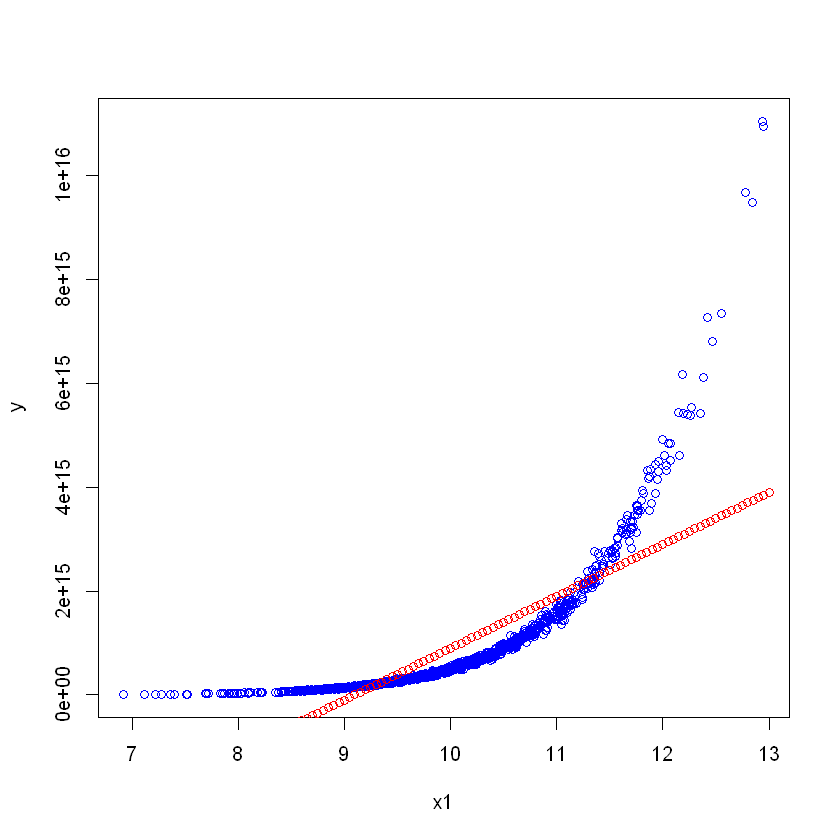

[1] "Respuesta de la pregunta 2.2"
[1] "Tiene un R2 cercano a uno por lo tanto es muy bueno, las covariables son significativas y el gráfico se ajusta muy bien, por tanto es un muy buen modelo"


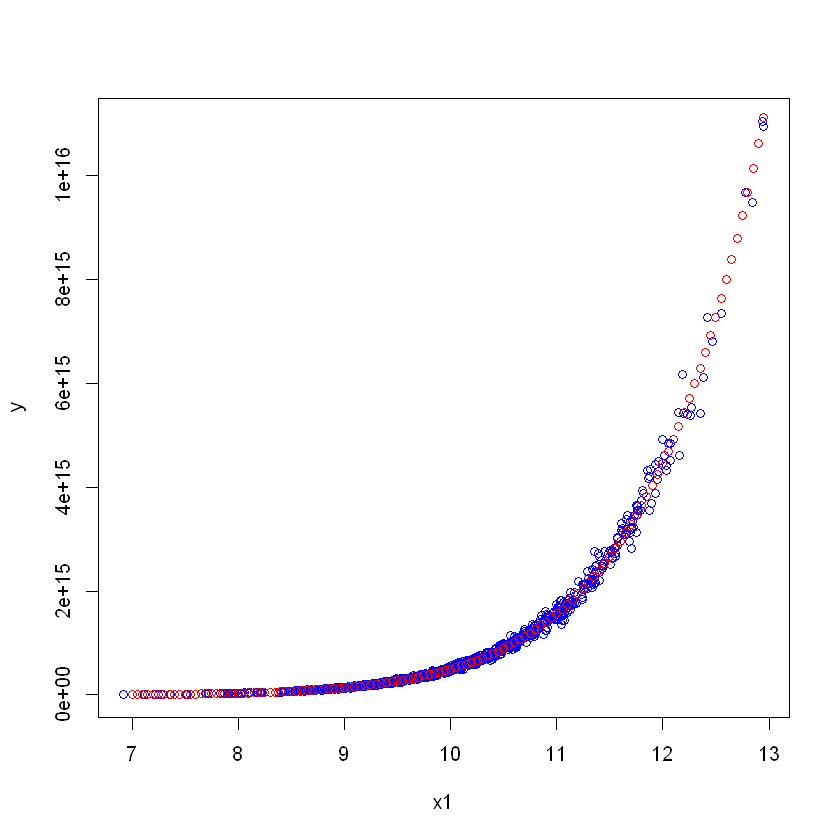

In [145]:
## Aplica tus conocimientos para el control 4
#
## Nombre: Fabián Ramírez
#
# Problema 1
#
## Lea la base de datos:
data = iris
##
plot(data)
##
# Ajuste un modelo de regresión multiple para la variable Petal.Length 
reg_iris = lm(Petal.Length~.,data=data)
summary(reg_iris)
#Si tomo una significancia del 0.01, ¿que covariables son significativas?
print('Respuesta a la Pregunta 1.1')
print('Todas menos Sepal.Width')
# Realice una regresión multible con todas las covariables excepto la menos significativa
data2 = data[-2]
reg_alternativa = lm(Petal.Length~.,data=data2)
summary(reg_alternativa)
# ¿Cúal modelo es mejor?,¿Por qué?
print('Respuesta a la Pregunta 1.2')
print('La segunda regresión puesto que tiene casi los mismos R2 y usa menos covariables.')
#
#
## Pregunta 2
#
## Se trata de estimar un modelo para los casos de una cierta enfermedad
## en la base de datos x1 corresponde al tiempo desordenado e y representa
## el número de casos
#
#
## Propón un modelo de regresión simple y argumenta su utilidad
#
datos = read.csv('casos.csv')
x1 =datos$x1
y  =datos$y
reg_base = lm(y~x1)
#
pp = seq(7,13,0.05)
predict = reg_base$coef[1]*rep(1,length(pp))  + reg_base$coef[2]*pp
plot(x1,y,col='blue')
points(pp,predict,col='red')
#
#
print('Respuesta de la pregunta 2.1')
print('Tiene un R2, es decir su capacidad para explicar los datos o predecir es baja. Por lo tanto no es un buen modelo')
#
#
## Ahora un cientifico dice que un buen modelo debería ser de la forma
## y = a*x1^b, realice mediante un modelo de regresión la estimación
## de a y b, argumente la calidad del modelo y realice un plot
#
## Aquí escriba la transformación del modelo: log(y)=log(a)+b log(x)
#
nx = log(x1)
ny = log(y)
reg_nueva = lm(ny~nx)
pp = log(seq(7,13,0.05))
predict = exp( pp*reg_nueva$coef[2]+reg_nueva$coef[1]*rep(1,length(pp)))
plot(x1,y,col='blue')
points(exp(pp),predict,col='red')
print('Respuesta de la pregunta 2.2')
print('Tiene un R2 cercano a uno por lo tanto es muy bueno, las covariables son significativas y el gráfico se ajusta muy bien, por tanto es un muy buen modelo')


In [146]:
reg_iris=lm(iris$Petal.Length~iris$Petal.Width)
pp = seq(0,7,0.01)
predict = reg_iris$coef[1]*rep(1,length(pp))  + reg_iris$coef[2]*pp

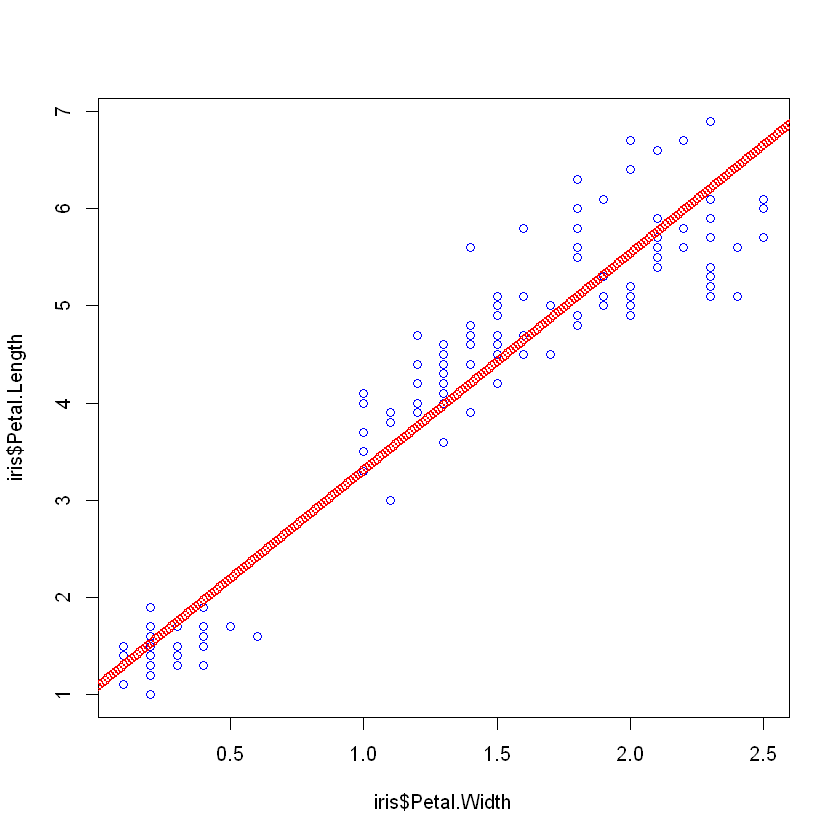

In [147]:
plot(iris$Petal.Width,iris$Petal.Length,col='blue')
points(pp,predict,col='red')

In [148]:
cupo_disponible_antiguo= 342341
cupo_utilizado_antiguo = 557659

In [149]:
cupo_disponible_antiguo+cupo_utilizado_antiguo

[1] 9e+05

In [150]:
gasto=18151+20570+16113+15990+5000+775+9471+3014+9196+17890+8320

In [151]:
cupo_utilizado_antiguo + gasto

[1] 682149

In [152]:
cupo_disponible_antiguo - gasto

[1] 217851

In [153]:
gasto

[1] 124490

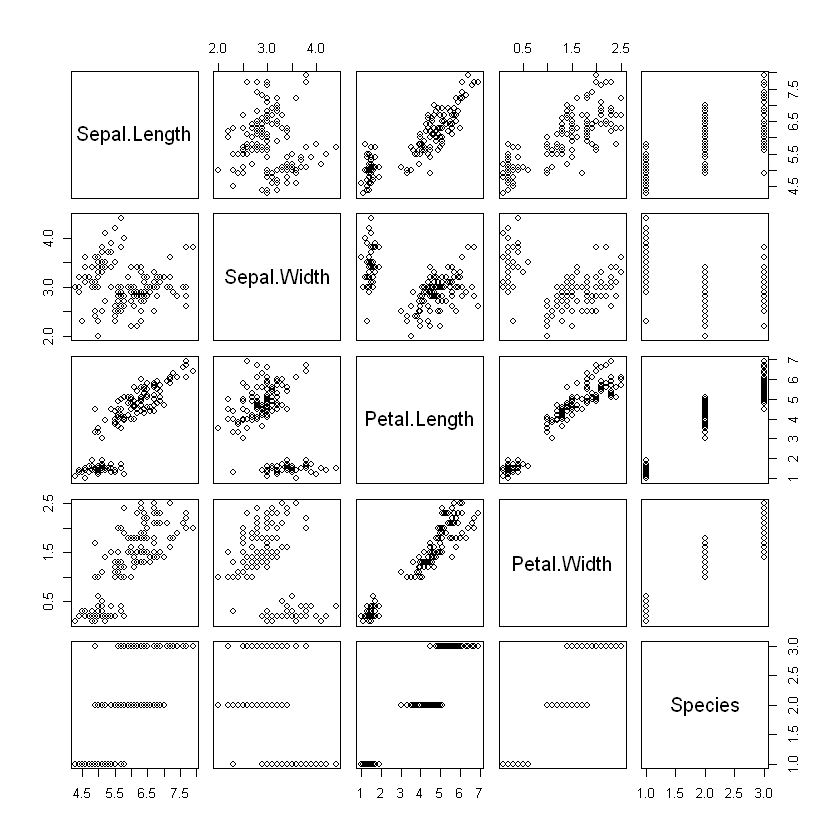

[1] 0.9628654

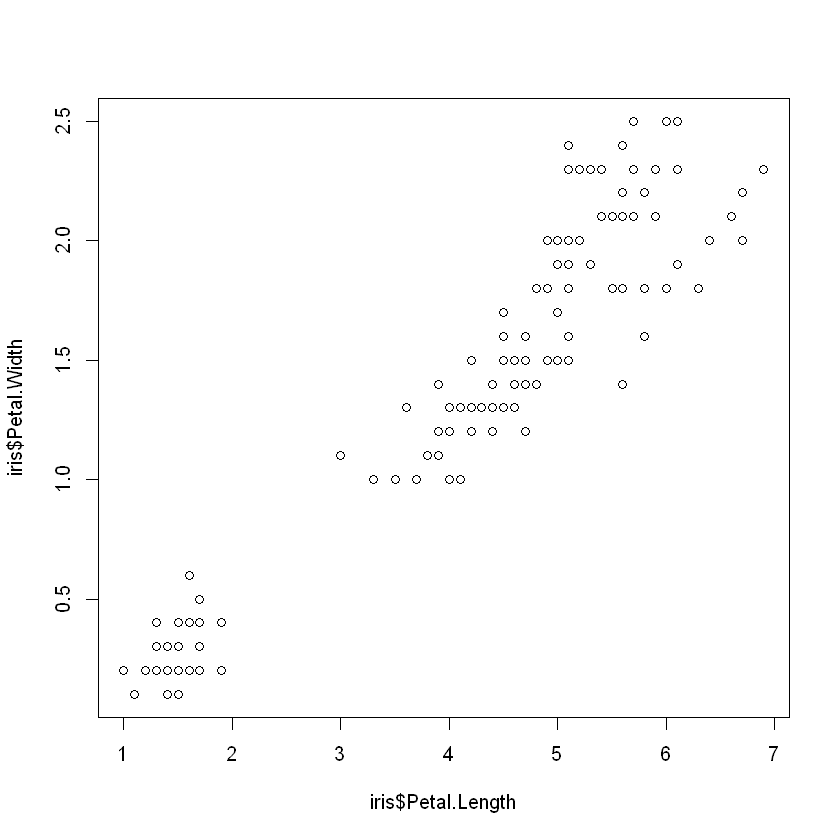

In [154]:
plot(iris)
plot(iris$Petal.Length,iris$Petal.Width)
cor(iris$Petal.Length,iris$Petal.Width)

In [155]:
x4=rnorm(150,0,100)

In [156]:
reg=lm(iris$Petal.Length~iris$Petal.Width+ iris$Sepal.Length + iris$Sepal.Width + x4)
summary(reg)


Call:
lm(formula = iris$Petal.Length ~ iris$Petal.Width + iris$Sepal.Length + 
    iris$Sepal.Width + x4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96744 -0.17824 -0.01037  0.19760  1.06397 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.2680863  0.2967433  -0.903    0.368    
iris$Petal.Width   1.4508283  0.0675257  21.486  < 2e-16 ***
iris$Sepal.Length  0.7240175  0.0583177  12.415  < 2e-16 ***
iris$Sepal.Width  -0.6354795  0.0688192  -9.234 2.94e-16 ***
x4                -0.0003615  0.0002788  -1.297    0.197    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3182 on 145 degrees of freedom
Multiple R-squared:  0.9684,	Adjusted R-squared:  0.9675 
F-statistic:  1110 on 4 and 145 DF,  p-value: < 2.2e-16
